In [29]:
import numpy as np
import pandas as pd
import os 
import logging
logging.getLogger().setLevel(logging.INFO)

# Filtering pyCBC Triggers

## Load Triggers

In [30]:
from pycbc_trigger_parser import TriggerTable, TriggerTableTimes, TemplateBank
from pycbc_trigger_parser.trigger_table_webpage import TriggerPage
from pycbc_trigger_parser.trigger_table_webpage import kwargs as plotting_kwargs
from pycbc_trigger_parser.utils import filter_dataframe
from pycbc_trigger_parser.plotting import plot_template_bank
from pycbc_trigger_parser.data.o3 import chunk6
from pycbc_trigger_parser.data import pycbc_data

In [31]:
unfiltered_background_csv_file_path = "/home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/background/background_triggers.csv"
unfiltered_foreground_csv_file_path = "/home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/foreground/foreground_triggers.csv"

software_csv_file_path = "/home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/software/triggers.csv"
background_csv_file_path = "/home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/background/triggers.csv"
foreground_csv_file_path = "/home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/foreground/triggers.csv"
data = dict(
    background=background_csv_file_path,
    swinj=software_csv_file_path,
    foreground=foreground_csv_file_path,
)

bank_csv_path = "/home/avi.vajpeyi/projects/pycbc_trigger_parser/pycbc_trigger_parser/data/o3/template_bank.csv"

In [32]:
tables = {k:TriggerTable.from_csv(c) for k,c in data.items()}


background_trigger_dataframe = tables["background"].to_dataframe()
background_trigger_dataframe.describe().transpose()

INFO:root:Generating trigger table from /home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/background/triggers.csv
INFO:root:Generating trigger table from /home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/software/triggers.csv
INFO:root:Generating trigger table from /home/avi.vajpeyi/projects/bcr_discriminator/trigger_extraction/foreground/triggers.csv


,count,mean,std,min,25%,50%,75%,max
ifar,1564.0,9.302646e-01,1.281214e+01,9.575431e-07,1.382035e-04,2.466338e-03,5.258725e-03,3.471731e+02
stat,1564.0,7.858320e+00,5.368076e-01,5.656854e+00,7.599807e+00,8.005278e+00,8.102814e+00,9.419408e+00
snr,1564.0,8.152353e+00,1.831174e+00,6.392824e+00,7.240878e+00,7.610133e+00,8.288687e+00,3.790069e+01
timeslide_value,1564.0,2.532989e+04,3.554354e+05,-7.317000e+05,-1.801050e+05,2.421450e+04,2.830650e+05,7.155000e+05
H1_snr,1564.0,5.582823e+00,1.379215e+00,4.251641e+00,4.996048e+00,5.264480e+00,5.696430e+00,3.756218e+01
H1_start_time,1564.0,1.242159e+09,2.502192e+05,1.241739e+09,1.241862e+09,1.242246e+09,1.242362e+09,1.242482e+09
H1_trigger_time,1564.0,1.242159e+09,2.502192e+05,1.241739e+09,1.241862e+09,1.242246e+09,1.242362e+09,1.242482e+09
H1_template_duration,1564.0,3.169436e-01,9.357675e-02,1.501028e-01,2.356510e-01,3.324997e-01,4.006753e-01,4.538736e-01
H1_trigger_id,1564.0,3.802338e+08,1.972377e+08,7.651130e+05,2.074004e+08,4.150290e+08,5.478629e+08,6.974819e+08
L1_snr,1564.0,5.838899e+00,1.628478e+00,4.348589e+00,5.007103e+00,5.249482e+00,5.876455e+00,2.939579e+01


## Filter Triggers based on Duration

In [33]:
MAX_DURATION = 0.454 # Based on pyCBC's template duration

filtered_tables = {
        k:t.get_filtered_table(
        H1_template_duration_max=MAX_DURATION,
        L1_template_duration_max=MAX_DURATION,
    ) for k,t in tables.items()
}


INFO:root:1564 triggers before filtering
INFO:root:Filtering with the condition: (H1_template_duration<=0.454)&(L1_template_duration<=0.454)
INFO:root:1564 triggers after filtering
INFO:root:1607 triggers before filtering
INFO:root:Filtering with the condition: (H1_template_duration<=0.454)&(L1_template_duration<=0.454)
INFO:root:208 triggers after filtering
INFO:root:17 triggers before filtering
INFO:root:Filtering with the condition: (H1_template_duration<=0.454)&(L1_template_duration<=0.454)
INFO:root:17 triggers after filtering


In [34]:
filtered_tables["background"].to_dataframe().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ifar,1564.0,9.302646e-01,1.281214e+01,9.575431e-07,1.382035e-04,2.466338e-03,5.258725e-03,3.471731e+02
stat,1564.0,7.858320e+00,5.368076e-01,5.656854e+00,7.599807e+00,8.005278e+00,8.102814e+00,9.419408e+00
snr,1564.0,8.152353e+00,1.831174e+00,6.392824e+00,7.240878e+00,7.610133e+00,8.288687e+00,3.790069e+01
timeslide_value,1564.0,2.532989e+04,3.554354e+05,-7.317000e+05,-1.801050e+05,2.421450e+04,2.830650e+05,7.155000e+05
H1_snr,1564.0,5.582823e+00,1.379215e+00,4.251641e+00,4.996048e+00,5.264480e+00,5.696430e+00,3.756218e+01
H1_start_time,1564.0,1.242159e+09,2.502192e+05,1.241739e+09,1.241862e+09,1.242246e+09,1.242362e+09,1.242482e+09
H1_trigger_time,1564.0,1.242159e+09,2.502192e+05,1.241739e+09,1.241862e+09,1.242246e+09,1.242362e+09,1.242482e+09
H1_template_duration,1564.0,3.169436e-01,9.357675e-02,1.501028e-01,2.356510e-01,3.324997e-01,4.006753e-01,4.538736e-01
H1_trigger_id,1564.0,3.802338e+08,1.972377e+08,7.651130e+05,2.074004e+08,4.150290e+08,5.478629e+08,6.974819e+08
L1_snr,1564.0,5.838899e+00,1.628478e+00,4.348589e+00,5.007103e+00,5.249482e+00,5.876455e+00,2.939579e+01


## Save filtered trigger table and times

In [35]:
save_filtered_trg_table = False 
generate_webpage = False

if save_filtered_trg_table:
    OUTDIR = './triggers_filtered_by_454ms/'
    os.makedirs(OUTDIR, exist_ok=True)

    # same trigger table
    trigger_filename = os.path.join(OUTDIR, "triggers.csv")
    filtered_bkg_trg_table.to_csv(trigger_filename)

    # time txt files for analysis
    logging.info("Generating trigger times table")
    trigger_time = TriggerTableTimes(filtered_bkg_trg_table)
    trigger_time.save_time_txt_files(txt_dir=OUTDIR)
    trigger_time.to_csv(os.path.join(OUTDIR, "times.csv"))


if generate_webpage:
    # summary pages
    logging.info("Generating trigger page for filtered data")
    trigger_page = TriggerPage(
        webdir=OUTDIR,
        trigger_csv=trigger_filename,
        title="Filtered O3 Chunk6 Triggers",
        number_samples=None,
        bank_file_path='template_bank_masses_with_event.png',
        start_time=chunk6.START_TIME,
        end_time=chunk6.END_TIME
        )
    trigger_page.render()

## Get Max-Min Mass Parameter Values from triggers

In [36]:
filtered_trigger_dataframe = filtered_tables["background"].to_dataframe()
mass_column_headers = filtered_trigger_dataframe.columns[filtered_trigger_dataframe.columns.str.contains('mass')]
mass_statistics = filtered_trigger_dataframe[mass_column_headers].describe()
mass_statistics.transpose()[['min','max','mean','std']]

,min,max,mean,std
mass_1,31.539850,491.682070,188.668219,137.596930
mass_2,1.319664,121.014600,26.121947,18.698464
mass_total,56.931190,496.718000,214.790167,135.127435
mass_chirp,8.006308,174.562685,47.216523,24.181049
mass_ratio,0.010242,0.975642,0.270029,0.248725


In [37]:
constraints = ""
constraints_dict = {}
for header in mass_column_headers:
    constraints_dict.update({
        f"{header}_min": mass_statistics[header]['min'],
        f"{header}_max": mass_statistics[header]['max'],
    })
    constraints += f"{mass_statistics[header]['min']:.2f} <= {header} <= {mass_statistics[header]['max']:.2f}\n"
print(constraints)

31.54 <= mass_1 <= 491.68
1.32 <= mass_2 <= 121.01
56.93 <= mass_total <= 496.72
8.01 <= mass_chirp <= 174.56
0.01 <= mass_ratio <= 0.98



## Plot new constraints on template bank

In [38]:
@np.vectorize
def my_criteria(m1: float, m2: float, mc: float, q: float, M: float) -> int:
    """
    :param m1: mass1 val
    :param m2: mass2 val
    :param mc: chirp mass val
    :param q: mass ratio val
    :param M: total mass val
    :return: 1 if above parameters inside criteria (defined in function), otherwise 0
    """
    if (
            #mass_statistics.mass_1['min'] <= m1 <= mass_statistics.mass_1['max'] and
            #mass_statistics.mass_2['min'] <= m2 <= mass_statistics.mass_2['max'] and
            mass_statistics.mass_chirp['min'] <= mc <= mass_statistics.mass_chirp['max'] and
            mass_statistics.mass_ratio['min'] <= q <= mass_statistics.mass_ratio['max'] and
            mass_statistics.mass_total['min'] <= M <= mass_statistics.mass_total['max']
    ):
        return 1
    else:
        return 0

INFO:root:Plotting template bank
INFO:root:plotting m1-m2 contour
100%|██████████| 1000/1000 [02:33<00:00,  5.93it/s]
INFO:root:plotting q-mc contour
100%|██████████| 1000/1000 [03:24<00:00,  5.60it/s]
/home/avi.vajpeyi/projects/pycbc_trigger_parser/pycbc_trigger_parser/plotting.py:54: UserWarning:

No contour levels were found within the data range.

/home/avi.vajpeyi/projects/pycbc_trigger_parser/pycbc_trigger_parser/plotting.py:54: UserWarning:

The following kwargs were not used by contour: 'label'

/home/avi.vajpeyi/projects/pycbc_trigger_parser/pycbc_trigger_parser/plotting.py:55: UserWarning:

No contour levels were found within the data range.

/home/avi.vajpeyi/projects/pycbc_trigger_parser/pycbc_trigger_parser/plotting.py:55: UserWarning:

The following kwargs were not used by contour: 'label'



Plotting compete!


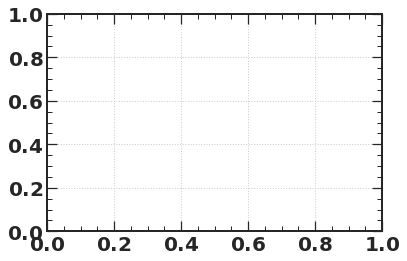

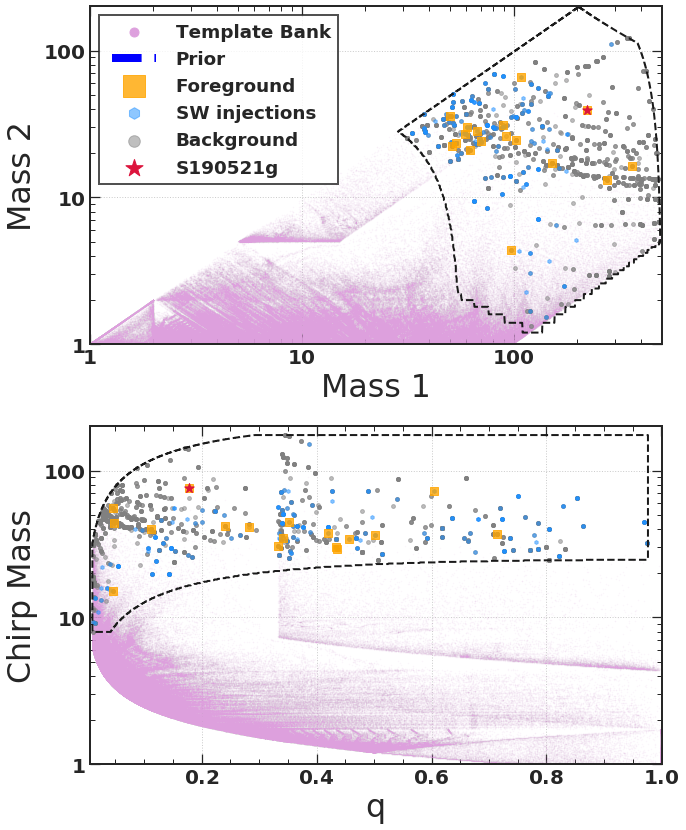

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

data_plot_kwargs = {
    "background": {
        "label": "Background",
        "color": "gray",
        "marker": "o",  # (5, 2),
        "s": 15,
        "alpha": 0.5,
    },
    "swinj": {
        "label": "SW injections",
        "color": "dodgerblue",
        "marker": "h",
        "s": 15,
        "alpha": 0.5,
    },
    "foreground": {
        "label": "Foreground",
        "color": "orange",
        "marker": "s",
        "s": 50,
        "alpha": 0.8,
    },
    }

plt.set_loglevel("info")

def set_legend_for_bank_plot(ax):
    """ set up legened for the bank plot

    :param ax:
    :return:
    """
    ax.get_legend().remove()
    bank_patch = ax.scatter([], [], label="Template Bank", marker=".", color="plum")
   

    blue_line = mlines.Line2D([], [],  label="Prior", color='blue', linestyle="--")
    
    prior_patch = ax.plot([], [], label="Prior", linestyle="--", color="k")
    foreground_patch = ax.scatter([], [], **data_plot_kwargs["foreground"])
    swinj_patch = ax.scatter([], [],  **data_plot_kwargs["swinj"])
    background_patch = ax.scatter([], [], **data_plot_kwargs["background"])
    handles = [bank_patch, blue_line, foreground_patch, swinj_patch, background_patch]
    ax.legend(handles=handles, labels= ["Templates", "Prior", "Foreground", "Software Inj", "Background"], fontsize="small", markerscale=3)
    return handles, ax




def plot_bank_with_constraints(save_dir="."):
    template_bank = TemplateBank.from_csv(bank_csv_path)

    bank_kwargs = dict(
        color="plum",
        s=0.5,
        marker=".",
        alpha=0.1,
        label="Template Bank",
    )
    
    data_points = [
        dict(
            data=filtered_table.to_dataframe(),
            plot_kwargs=dict(**data_plot_kwargs[k]),
        )
        for k, filtered_table in filtered_tables.items()
    ]

    scatter_points = [
        # TEMPLATE BANK
        dict(
            data=template_bank.to_dataframe(),
            plot_kwargs=dict(**bank_kwargs),
        )
    ] + data_points

    countour_lines = [
                dict(
                    contour_condition=my_criteria,
                    plot_kwargs=dict(
                        colors="k", linestyles="--", linewidths=2.0, label="Prior"
                    ),
                )
    ]
    kwargs = dict(
        scatter_points=scatter_points,
        countour_lines=countour_lines,
        web_dir=save_dir,
    )
    ax_m1m2, ax_mcq, legend_handles = plot_template_bank(**kwargs)

    legend_handles, ax_m1m2 = set_legend_for_bank_plot(ax_m1m2)
    
    ax_m1m2.scatter(
        chunk6.S190521g["mass_1"],
        chunk6.S190521g["mass_2"],
        color="crimson",
        marker="*",
        s=100,
        label="S190521g",
    )
    ax_mcq.scatter(
        chunk6.S190521g["mass_ratio"],
        chunk6.S190521g["mass_chirp"],
        color="crimson",
        marker="*",
        s=100,
        label="S190521g",
    )
    event_patch = ax_m1m2.scatter([], [], label="S190521g", marker="*", color="crimson")
    legend_handles = legend_handles + [event_patch]
    ax_m1m2.legend(handles=legend_handles, fontsize="small", markerscale=3)
    plt.savefig('template_bank_masses.png')
    print("Plotting compete!")


plot_bank_with_constraints()


## Number of templates after filtering

In [49]:
def get_number_of_templates_in_constraints(filtering_constraints):
    template_bank = TemplateBank.from_csv(bank_csv_path)
    num_original = len(template_bank.to_dataframe())
    filtered_template_bank = template_bank.get_filtered_bank(**constraints_dict)
    num_filtered = len(filtered_template_bank.to_dataframe())
    return num_original, num_filtered
    
num_original, num_filtered = get_number_of_templates_in_constraints(constraints_dict)
print(f"Total #templates: {num_original}\n#templates in prior: {num_filtered}")



INFO:root:428725 templates before filtering
INFO:root:Filtering with the condition: (mass_1>=31.53985)&(mass_1<=491.68207)&(mass_2>=1.3196643999999995)&(mass_2<=121.0146)&(mass_total>=56.93119)&(mass_total<=496.718)&(mass_chirp>=8.006308005625234)&(mass_chirp<=174.56268485661633)&(mass_ratio>=0.010242215)&(mass_ratio<=0.9756425)
INFO:root:22022 templates after filtering


Total #templates: 428725
#templates in prior: 22022
